In [ ]:
# Importing the libaries
import numpy as np
from numpy import load
import tensorflow as tf
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

I've transformed the images into NumPy arrays and subsequently stored them in the .npy format. Now, I'm attempting to read those images.

In [ ]:
# Reading the numpy arrays of images
annual_crop_images = load('./annual_images.npy')
forest_images = load('./forest_images.npy')
herbaceous_images = load('./herbaceous_images.npy')
highway_images = load('./highway_images.npy')
industry_images = load("./industry_images.npy")
pasture_images = load('./pasture_images.npy')
permanent_crop_images = load('./permanent_crop_images.npy')
residential_images = load('./residential_images.npy')
sealake_images = load('./sealake_images.npy')

I've developed a function to assign labels to the images as part of the classification process.

In [ ]:
# Function for labeling the images
def label_images(images, labels, label_no):
  for image in range(images.shape[0]):
    labels.append(label_no)
  return labels

In [ ]:
# Preprocessing the image
# Here images are in different folders so needs to concatenate

annual_crop_labels = label_images(annual_crop_images, [], 0)
forest_labels = label_images(forest_images, [], 1)
herbaceous_labels = label_images(herbaceous_images, [], 2)
highway_labels = label_images(highway_images, [], 3)
industry_labels = label_images(industry_images, [], 4)
pasture_labels = label_images(pasture_images, [], 5)
permanent_crop_label = label_images(permanent_crop_images, [], 6)
residential_labels = label_images(residential_images, [], 7)
sealake_labels = label_images(sealake_images, [], 8)

# Concatenate all the image arrays into a single array
images = np.concatenate((annual_crop_images, forest_images, herbaceous_images, highway_images, industry_images, pasture_images, permanent_crop_images, residential_images, sealake_images), axis=0)
# Convert the list of labels into a NumPy array
labels = np.concatenate((annual_crop_labels, forest_labels, herbaceous_labels, highway_labels, industry_labels, pasture_labels, permanent_crop_label, residential_labels, sealake_labels), axis =0 )

# Reshape the labels to 22000x1
labels_reshaped = labels.reshape((22000, 1))

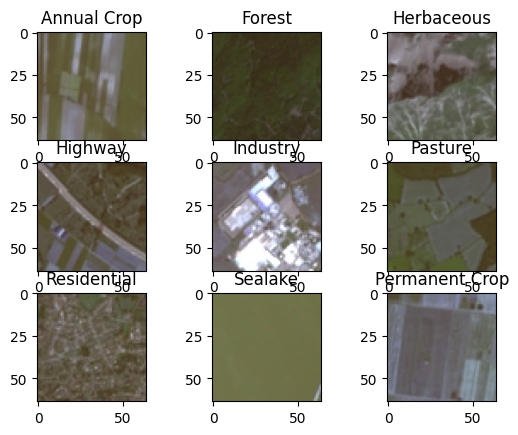

In [ ]:
# Display all images:
figure, axis = plt.subplots(3, 3)

axis[0, 0].imshow(annual_crop_images[0])
axis[0,0].set_title('Annual Crop')

axis[0,1].imshow(forest_images[46])
axis[0,1].set_title('Forest')

axis[0,2].imshow(herbaceous_images[0])
axis[0,2].set_title('Herbaceous')

axis[1,0].imshow(highway_images[0])
axis[1,0].set_title('Highway')

axis[1,1].imshow(industry_images[0])
axis[1,1].set_title('Industry')

axis[1,2].imshow(pasture_images[0])
axis[1,2].set_title('Pasture')

axis[2,0].imshow(residential_images[0])
axis[2,0].set_title('Residential')

axis[2,1].imshow(sealake_images[202])
axis[2,1].set_title('Sealake')

axis[2,2].imshow(permanent_crop_images[0])
axis[2,2].set_title('Permanent Crop')

plt.show()

In [ ]:
# Normalize the image
normalized_images = images.astype('float32') / 255.0

# Input : normalized_images
# Labels: labels_reshaped

I've constructed a Convolutional Neural Network (**CNN**) model comprising three convolutional layers, each followed by a max-pooling layer. After these convolutional layers, there's a fully connected layer. The key variables defining the model architecture include:

1.**Input Shape**: This specifies the dimensions of the input data, typically representing the height, width, and number of channels of the input images. For instance, if the input images are grayscale with dimensions 28x28 pixels, the input shape would be (64, 64, 3).

2.**Kernel Size**: In the context of convolutional layers, the kernel size indicates the dimensions of the filters applied to the input data. These filters slide over the input to extract features. The kernel size is usually defined as a tuple, such as (3, 3) for a 3x3 filter.

3.**Number of Classes**: This parameter signifies the total number of output classes in the classification task. For example, if the goal is to classify images into 10 different categories, the number of classes would be 10.

4.**Dropout**: Dropout is a regularization technique employed to prevent overfitting in neural networks. It randomly deactivates a fraction of neurons during training to enhance generalization. The availability of dropout in your model is typically indicated by a probability value, representing the fraction of neurons to be dropped during training.

5.**Padding**: Padding is a technique utilized to maintain the spatial dimensions of the input volume when applying convolutional operations. It involves adding additional pixels around the input data. Padding can be specified as either 'valid', indicating no padding, or 'same', signifying that the output feature maps have the same spatial dimensions as the input.

6.**Stride**: Stride refers to the number of pixels the filter moves across the input data. It determines the displacement between consecutive applications of the filter. A stride of 1 implies that the filter moves one pixel at a time, while a stride of 2 indicates a two-pixel displacement. If stride is incorporated into your model, it's typically defined as a tuple denoting the stride along each dimension, like (1, 1).

In [ ]:
# Creating the model
# This calss takes below things as an input
# Inputs: Input shape, Kernel Size, Number of classes and is dropout layes available or not
# Output: Will generate a model and it's summary

class CNN:
  def __init__(self, input_shape, kernel_size, num_classes, is_dropout, is_padding, is_stride):
    super().__init__()
    self.input_shape = input_shape
    self.kernel_size = kernel_size
    self.num_classes = num_classes
    self.is_dropout = is_dropout
    self.is_padding = is_padding
    self.is_stride = is_stride
    self.model = self.create_model()
    self.model_summary()

  def create_model(self):
    padding = 'SAME'
    stride = 1
    if(self.is_padding):
      padding = 'VALID'
    if(self.is_stride):
      stride = 2
    model = Sequential()
    model.add(Conv2D(32, (self.kernel_size, self.kernel_size), activation='relu', input_shape= self.input_shape, padding = padding, strides = stride))
    # model.add(tf.keras.layers.BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(64, (self.kernel_size, self.kernel_size), activation='relu', padding = padding, strides = stride))
    # model.add(tf.keras.layers.BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(128, (self.kernel_size, self.kernel_size), activation='relu', padding = padding, strides = stride))
    # model.add(tf.keras.layers.BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    if(self.is_dropout):
      model.add(tf.keras.layers.Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    # model.add(tf.keras.layers.BatchNormalization())
    if(self.is_dropout):
      model.add(tf.keras.layers.Dropout(0.5))
    model.add(Dense(9, activation='softmax'))
    return model

  def model_summary(self):
    self.model.summary()

Image shape is  (64, 64, 3)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooli

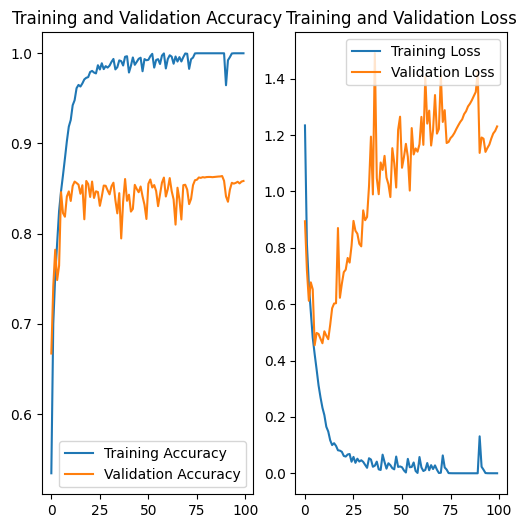

In [ ]:
# First I have started with the number of epochs and I found that after 100 epochs the output is almost same
# so here I will go with 100 epochs.
# Epochs
input_shape = normalized_images[0].shape
kernel_size = 3
num_of_classes = 9
batch_size = 32
is_dropout = False
is_padding = False
is_stride = False
epochs = 100
print("Image shape is ", input_shape)

model_for_epochs_experiment = CNN(input_shape, kernel_size, num_of_classes, is_dropout, is_padding, is_stride)

# Spliting the data for training and testing
# Data is Prepared for the train and test
X_train, X_test, y_train, y_test = train_test_split(normalized_images, labels_reshaped, test_size = 0.4, random_state=42)

# Compile the model with adam optimizer, and sparse categorical loss function
model_for_epochs_experiment.model.compile(
    optimizer = 'Adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history_for_epoch_experiment = model_for_epochs_experiment.model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs= epochs)

acc = history_for_epoch_experiment.history['accuracy']
val_acc = history_for_epoch_experiment.history['val_accuracy']

# Getting the values of loss of both training and validation set
loss = history_for_epoch_experiment.history['loss']
val_loss = history_for_epoch_experiment.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



**Test 2**
Same model, same epochs but different learning rates

In [ ]:
# Learning rate 0.001
input_shape = normalized_images[0].shape
kernel_size = 3
num_of_classes = 9
batch_size = 32
is_dropout = True
is_padding = False
is_stride = False
epochs = 100
print("Image shape is ", input_shape)

learning_rate_1 = CNN(input_shape, kernel_size, num_of_classes, is_dropout, is_padding, is_stride)

# Spliting the data for training and testing
# Data is Prepared for the train and test
X_train, X_test, y_train, y_test = train_test_split(normalized_images, labels_reshaped, test_size = 0.4, random_state=42)

# Compile the model with adam optimizer, and sparse categorical loss function
learning_rate_1.model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history_lr_1 = learning_rate_1.model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs= epochs)

NameError: name 'normalized_images' is not defined

In [ ]:
# Learning rate 0.01
input_shape = normalized_images[0].shape
kernel_size = 3
num_of_classes = 9
batch_size = 32
is_dropout = True
is_padding = False
is_stride = False
epochs = 100
print("Image shape is ", input_shape)

learning_rate_2 = CNN(input_shape, kernel_size, num_of_classes, is_dropout, is_padding, is_stride)

# Spliting the data for training and testing
# Data is Prepared for the train and test
X_train, X_test, y_train, y_test = train_test_split(normalized_images, labels_reshaped, test_size = 0.4, random_state=42)

# Compile the model with adam optimizer, and sparse categorical loss function
learning_rate_2.model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history_lr_2 = learning_rate_2.model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs= epochs)

Image shape is  (64, 64, 3)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooli

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


413/413 [==============================] - 6s 10ms/step - loss: 1.7953 - accuracy: 0.2857 - val_loss: 1.4970 - val_accuracy: 0.3942
Epoch 2/100
413/413 [==============================] - 4s 9ms/step - loss: 1.5209 - accuracy: 0.3732 - val_loss: 1.2985 - val_accuracy: 0.4726
Epoch 3/100
413/413 [==============================] - 3s 8ms/step - loss: 1.4452 - accuracy: 0.4118 - val_loss: 1.2983 - val_accuracy: 0.4701
Epoch 4/100
413/413 [==============================] - 3s 8ms/step - loss: 1.4099 - accuracy: 0.4177 - val_loss: 1.2205 - val_accuracy: 0.4998
Epoch 5/100
413/413 [==============================] - 3s 8ms/step - loss: 1.3974 - accuracy: 0.4358 - val_loss: 1.2456 - val_accuracy: 0.5227
Epoch 6/100
413/413 [==============================] - 4s 8ms/step - loss: 1.3785 - accuracy: 0.4464 - val_loss: 1.3209 - val_accuracy: 0.4327
Epoch 7/100
413/413 [==============================] - 3s 8ms/step - loss: 1.3501 - accuracy: 0.4655 - val_loss: 1.2150 - val_accuracy: 0.5311
Epoch 8/10

In [ ]:
# Learning rate 0.1
input_shape = normalized_images[0].shape
kernel_size = 3
num_of_classes = 9
batch_size = 32
is_dropout = True
is_padding = False
is_stride = False
epochs = 100
print("Image shape is ", input_shape)

learning_rate_3 = CNN(input_shape, kernel_size, num_of_classes, is_dropout, is_padding, is_stride)

# Spliting the data for training and testing
# Data is Prepared for the train and test
X_train, X_test, y_train, y_test = train_test_split(normalized_images, labels_reshaped, test_size = 0.4, random_state=42)

# Compile the model with adam optimizer, and sparse categorical loss function
learning_rate_3.model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history_lr_3 = learning_rate_3.model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs= epochs)

Image shape is  (64, 64, 3)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPool

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


413/413 [==============================] - 6s 10ms/step - loss: 33.0874 - accuracy: 0.1318 - val_loss: 2.1460 - val_accuracy: 0.1338
Epoch 2/100
413/413 [==============================] - 3s 8ms/step - loss: 2.1552 - accuracy: 0.1342 - val_loss: 2.1432 - val_accuracy: 0.1338
Epoch 3/100
413/413 [==============================] - 3s 8ms/step - loss: 2.1434 - accuracy: 0.1352 - val_loss: 2.1436 - val_accuracy: 0.1338
Epoch 4/100
413/413 [==============================] - 3s 8ms/step - loss: 2.1438 - accuracy: 0.1316 - val_loss: 2.1379 - val_accuracy: 0.1365
Epoch 5/100
413/413 [==============================] - 4s 9ms/step - loss: 2.1425 - accuracy: 0.1359 - val_loss: 2.1523 - val_accuracy: 0.1365
Epoch 6/100
413/413 [==============================] - 4s 9ms/step - loss: 2.1442 - accuracy: 0.1303 - val_loss: 2.1416 - val_accuracy: 0.1365
Epoch 7/100
413/413 [==============================] - 4s 8ms/step - loss: 2.1439 - accuracy: 0.1299 - val_loss: 2.1445 - val_accuracy: 0.1424
Epoch 8/1

In [ ]:
# Learning rate 1
input_shape = normalized_images[0].shape
kernel_size = 3
num_of_classes = 9
batch_size = 32
is_dropout = True
is_padding = False
is_stride = False
epochs = 100
print("Image shape is ", input_shape)

learning_rate_4 = CNN(input_shape, kernel_size, num_of_classes, is_dropout, is_padding, is_stride)

# Spliting the data for training and testing
# Data is Prepared for the train and test
X_train, X_test, y_train, y_test = train_test_split(normalized_images, labels_reshaped, test_size = 0.4, random_state=42)

# Compile the model with adam optimizer, and sparse categorical loss function
learning_rate_4.model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=1),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history_lr_4 = learning_rate_4.model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs= epochs)

Image shape is  (64, 64, 3)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPool

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


413/413 [==============================] - 6s 12ms/step - loss: 9264341.0000 - accuracy: 0.1268 - val_loss: 2.2421 - val_accuracy: 0.1119
Epoch 2/100
413/413 [==============================] - 4s 9ms/step - loss: 2.2252 - accuracy: 0.1255 - val_loss: 2.1745 - val_accuracy: 0.1338
Epoch 3/100
413/413 [==============================] - 3s 8ms/step - loss: 2.2242 - accuracy: 0.1258 - val_loss: 2.2127 - val_accuracy: 0.1365
Epoch 4/100
413/413 [==============================] - 3s 8ms/step - loss: 2.2330 - accuracy: 0.1294 - val_loss: 2.1803 - val_accuracy: 0.1338
Epoch 5/100
413/413 [==============================] - 3s 8ms/step - loss: 2.2316 - accuracy: 0.1278 - val_loss: 2.1938 - val_accuracy: 0.1338
Epoch 6/100
413/413 [==============================] - 4s 10ms/step - loss: 2.2335 - accuracy: 0.1295 - val_loss: 2.1473 - val_accuracy: 0.1424
Epoch 7/100
413/413 [==============================] - 3s 8ms/step - loss: 2.2354 - accuracy: 0.1255 - val_loss: 2.3001 - val_accuracy: 0.1338
Epo

In [ ]:
# Learning rate 10
input_shape = normalized_images[0].shape
kernel_size = 3
num_of_classes = 9
batch_size = 32
is_dropout = True
is_padding = False
is_stride = False
epochs = 100
print("Image shape is ", input_shape)

learning_rate_5 = CNN(input_shape, kernel_size, num_of_classes, is_dropout, is_padding, is_stride)

# Spliting the data for training and testing
# Data is Prepared for the train and test
X_train, X_test, y_train, y_test = train_test_split(normalized_images, labels_reshaped, test_size = 0.4, random_state=42)

# Compile the model with adam optimizer, and sparse categorical loss function
learning_rate_5.model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=10),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history_lr_5 = learning_rate_5.model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs= epochs)

Image shape is  (64, 64, 3)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPool

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


413/413 [==============================] - 6s 10ms/step - loss: 1205192753152.0000 - accuracy: 0.1217 - val_loss: 2.9127 - val_accuracy: 0.1424
Epoch 2/100
413/413 [==============================] - 3s 7ms/step - loss: 2.9360 - accuracy: 0.1257 - val_loss: 3.0898 - val_accuracy: 0.1323
Epoch 3/100
413/413 [==============================] - 4s 9ms/step - loss: 3.0604 - accuracy: 0.1272 - val_loss: 2.6672 - val_accuracy: 0.1424
Epoch 4/100
413/413 [==============================] - 3s 8ms/step - loss: 2.9700 - accuracy: 0.1267 - val_loss: 3.0576 - val_accuracy: 0.1143
Epoch 5/100
413/413 [==============================] - 3s 8ms/step - loss: 3.0966 - accuracy: 0.1251 - val_loss: 2.7821 - val_accuracy: 0.1424
Epoch 6/100
413/413 [==============================] - 3s 8ms/step - loss: 2.9463 - accuracy: 0.1208 - val_loss: 3.6275 - val_accuracy: 0.1323
Epoch 7/100
413/413 [==============================] - 3s 8ms/step - loss: 3.0427 - accuracy: 0.1283 - val_loss: 2.8942 - val_accuracy: 0.133

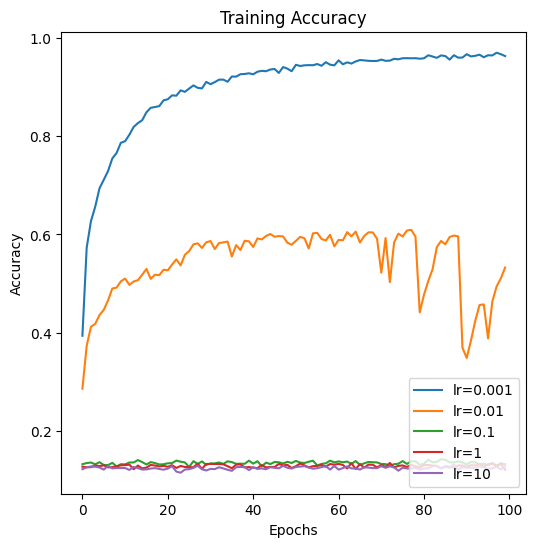

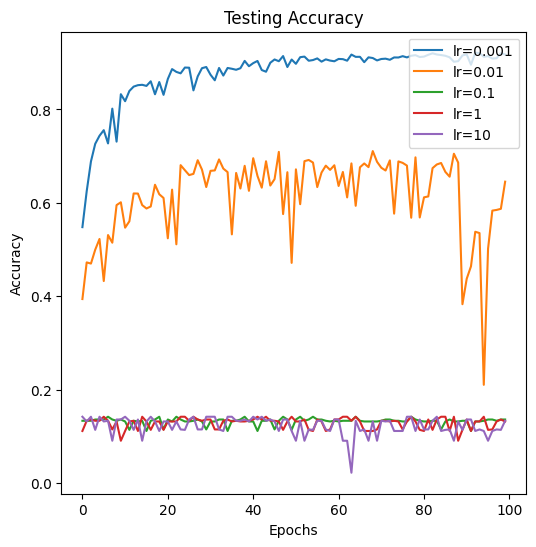

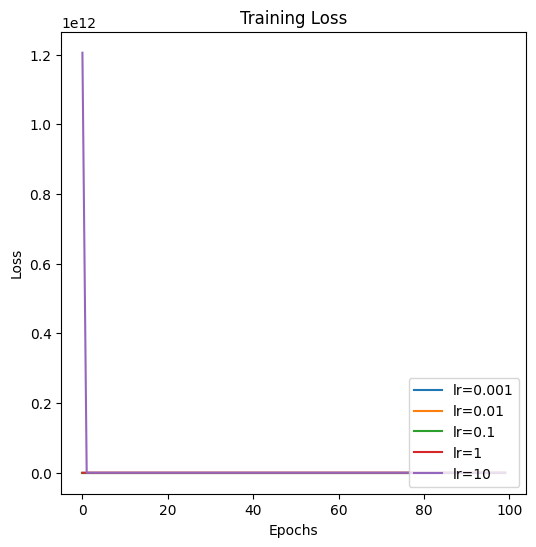

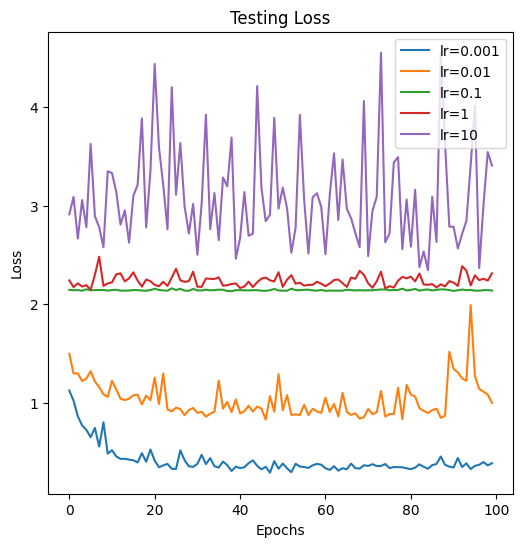

In [ ]:
# Getting testing accuracy and loss
train_acc_lr1 = history_lr_1.history['accuracy']
train_acc_lr2 = history_lr_2.history['accuracy']
train_acc_lr3 = history_lr_3.history['accuracy']
train_acc_lr4 = history_lr_4.history['accuracy']
train_acc_lr5 = history_lr_5.history['accuracy']

train_loss_lr1 = history_lr_1.history['loss']
train_loss_lr2 = history_lr_2.history['loss']
train_loss_lr3 = history_lr_3.history['loss']
train_loss_lr4 = history_lr_4.history['loss']
train_loss_lr5 = history_lr_5.history['loss']

# Getting Validation accuracy
test_acc_lr1 = history_lr_1.history['val_accuracy']
test_acc_lr2 = history_lr_2.history['val_accuracy']
test_acc_lr3 = history_lr_3.history['val_accuracy']
test_acc_lr4 = history_lr_4.history['val_accuracy']
test_acc_lr5 = history_lr_5.history['val_accuracy']

test_loss_lr1 = history_lr_1.history['val_loss']
test_loss_lr2 = history_lr_2.history['val_loss']
test_loss_lr3 = history_lr_3.history['val_loss']
test_loss_lr4 = history_lr_4.history['val_loss']
test_loss_lr5 = history_lr_5.history['val_loss']

# acc = history_for_epoch_experiment.history['accuracy']
# val_acc = history_for_epoch_experiment.history['val_accuracy']

# Getting the values of loss of both training and validation set
# loss = history_for_epoch_experiment.history['loss']
# val_loss = history_for_epoch_experiment.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(6, 6))
# plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc_lr1, label='lr=0.001')
plt.plot(epochs_range, train_acc_lr2, label='lr=0.01')
plt.plot(epochs_range, train_acc_lr3, label='lr=0.1')
plt.plot(epochs_range, train_acc_lr4, label='lr=1')
plt.plot(epochs_range, train_acc_lr5, label='lr=10')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.figure(figsize=(6, 6))
# plt.subplot(1, 2, 2)
plt.plot(epochs_range, test_acc_lr1, label='lr=0.001')
plt.plot(epochs_range, test_acc_lr2, label='lr=0.01')
plt.plot(epochs_range, test_acc_lr3, label='lr=0.1')
plt.plot(epochs_range, test_acc_lr4, label='lr=1')
plt.plot(epochs_range, test_acc_lr5, label='lr=10')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.title('Testing Accuracy')

plt.figure(figsize=(6, 6))
# plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss_lr1, label='lr=0.001')
plt.plot(epochs_range, train_loss_lr2, label='lr=0.01')
plt.plot(epochs_range, train_loss_lr3, label='lr=0.1')
plt.plot(epochs_range, train_loss_lr4, label='lr=1')
plt.plot(epochs_range, train_loss_lr5, label='lr=10')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.title('Training Loss')

plt.figure(figsize=(6, 6))
# plt.subplot(1, 2, 2)
plt.plot(epochs_range, test_loss_lr1, label='lr=0.001')
plt.plot(epochs_range, test_loss_lr2, label='lr=0.01')
plt.plot(epochs_range, test_loss_lr3, label='lr=0.1')
plt.plot(epochs_range, test_loss_lr4, label='lr=1')
plt.plot(epochs_range, test_loss_lr5, label='lr=10')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Testing Loss')

plt.show()

In [ ]:
# With three different kernel size 3,5,7
# Learning rate 10
input_shape = normalized_images[0].shape
kernel_size = 3
num_of_classes = 9
batch_size = 32
is_dropout = False
is_padding = False
is_stride = False
epochs = 100
print("Image shape is ", input_shape)

kernel_3 = CNN(input_shape, kernel_size, num_of_classes, is_dropout, is_padding, is_stride)

# Spliting the data for training and testing
# Data is Prepared for the train and test
X_train, X_test, y_train, y_test = train_test_split(normalized_images, labels_reshaped, test_size = 0.4, random_state=42)

# Compile the model with adam optimizer, and sparse categorical loss function
kernel_3.model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history_kernel_3 = kernel_3.model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs= epochs)

Image shape is  (64, 64, 3)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPool

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


413/413 [==============================] - 6s 11ms/step - loss: 1.2803 - accuracy: 0.5109 - val_loss: 0.9710 - val_accuracy: 0.6290
Epoch 2/100
413/413 [==============================] - 3s 8ms/step - loss: 0.8554 - accuracy: 0.6852 - val_loss: 0.7503 - val_accuracy: 0.7144
Epoch 3/100
413/413 [==============================] - 4s 9ms/step - loss: 0.6901 - accuracy: 0.7448 - val_loss: 0.5999 - val_accuracy: 0.7732
Epoch 4/100
413/413 [==============================] - 4s 10ms/step - loss: 0.5730 - accuracy: 0.7905 - val_loss: 0.6140 - val_accuracy: 0.7730
Epoch 5/100
413/413 [==============================] - 3s 7ms/step - loss: 0.5046 - accuracy: 0.8163 - val_loss: 0.4619 - val_accuracy: 0.8389
Epoch 6/100
413/413 [==============================] - 3s 7ms/step - loss: 0.4593 - accuracy: 0.8318 - val_loss: 0.4845 - val_accuracy: 0.8227
Epoch 7/100
413/413 [==============================] - 3s 7ms/step - loss: 0.4033 - accuracy: 0.8498 - val_loss: 0.5266 - val_accuracy: 0.8232
Epoch 8/1

In [ ]:
# With three different kernel size 3,5,7
# Learning rate 10
input_shape = normalized_images[0].shape
kernel_size = 5
num_of_classes = 9
batch_size = 32
is_dropout = False
is_padding = False
is_stride = False
epochs = 100
print("Image shape is ", input_shape)

kernel_5 = CNN(input_shape, kernel_size, num_of_classes, is_dropout, is_padding, is_stride)

# Spliting the data for training and testing
# Data is Prepared for the train and test
X_train, X_test, y_train, y_test = train_test_split(normalized_images, labels_reshaped, test_size = 0.4, random_state=42)

# Compile the model with adam optimizer, and sparse categorical loss function
kernel_5.model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history_kernel_5 = kernel_5.model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs= epochs)

Image shape is  (64, 64, 3)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 64, 64, 32)        2432      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 64)        51264     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 16, 16, 128)       204928    
                                                                 
 max_pooling2d_23 (MaxPool

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


413/413 [==============================] - 8s 14ms/step - loss: 1.4004 - accuracy: 0.4670 - val_loss: 1.0818 - val_accuracy: 0.6133
Epoch 2/100
413/413 [==============================] - 5s 11ms/step - loss: 0.9662 - accuracy: 0.6417 - val_loss: 1.0614 - val_accuracy: 0.6041
Epoch 3/100
413/413 [==============================] - 4s 11ms/step - loss: 0.8008 - accuracy: 0.7041 - val_loss: 0.7960 - val_accuracy: 0.7018
Epoch 4/100
413/413 [==============================] - 4s 9ms/step - loss: 0.7304 - accuracy: 0.7281 - val_loss: 0.7292 - val_accuracy: 0.7269
Epoch 5/100
413/413 [==============================] - 5s 12ms/step - loss: 0.6458 - accuracy: 0.7645 - val_loss: 0.7537 - val_accuracy: 0.7314
Epoch 6/100
413/413 [==============================] - 4s 9ms/step - loss: 0.5643 - accuracy: 0.7896 - val_loss: 0.6281 - val_accuracy: 0.7664
Epoch 7/100
413/413 [==============================] - 4s 9ms/step - loss: 0.5192 - accuracy: 0.8111 - val_loss: 0.5890 - val_accuracy: 0.7933
Epoch 8

In [ ]:
# With three different kernel size 3,5,7
# Learning rate 10
input_shape = normalized_images[0].shape
kernel_size = 7
num_of_classes = 9
batch_size = 32
is_dropout = False
is_padding = False
is_stride = False
epochs = 100
print("Image shape is ", input_shape)

kernel_7 = CNN(input_shape, kernel_size, num_of_classes, is_dropout, is_padding, is_stride)

# Spliting the data for training and testing
# Data is Prepared for the train and test
X_train, X_test, y_train, y_test = train_test_split(normalized_images, labels_reshaped, test_size = 0.4, random_state=42)

# Compile the model with adam optimizer, and sparse categorical loss function
kernel_7.model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history_kernel_7 = kernel_7.model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs= epochs)

Image shape is  (64, 64, 3)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 64, 64, 32)        4736      
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 64)        100416    
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 128)       401536    
                                                                 
 max_pooling2d_26 (MaxPool

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


413/413 [==============================] - 9s 17ms/step - loss: 1.3935 - accuracy: 0.4417 - val_loss: 1.2301 - val_accuracy: 0.4877
Epoch 2/100
413/413 [==============================] - 5s 13ms/step - loss: 1.0060 - accuracy: 0.6183 - val_loss: 0.8988 - val_accuracy: 0.6689
Epoch 3/100
413/413 [==============================] - 6s 14ms/step - loss: 0.8566 - accuracy: 0.6877 - val_loss: 0.7781 - val_accuracy: 0.7275
Epoch 4/100
413/413 [==============================] - 6s 14ms/step - loss: 0.7379 - accuracy: 0.7292 - val_loss: 0.6914 - val_accuracy: 0.7442
Epoch 5/100
413/413 [==============================] - 6s 13ms/step - loss: 0.6741 - accuracy: 0.7529 - val_loss: 0.7786 - val_accuracy: 0.7082
Epoch 6/100
413/413 [==============================] - 5s 13ms/step - loss: 0.5995 - accuracy: 0.7783 - val_loss: 0.6453 - val_accuracy: 0.7651
Epoch 7/100
413/413 [==============================] - 6s 14ms/step - loss: 0.6397 - accuracy: 0.7668 - val_loss: 0.6088 - val_accuracy: 0.7722
Epoc

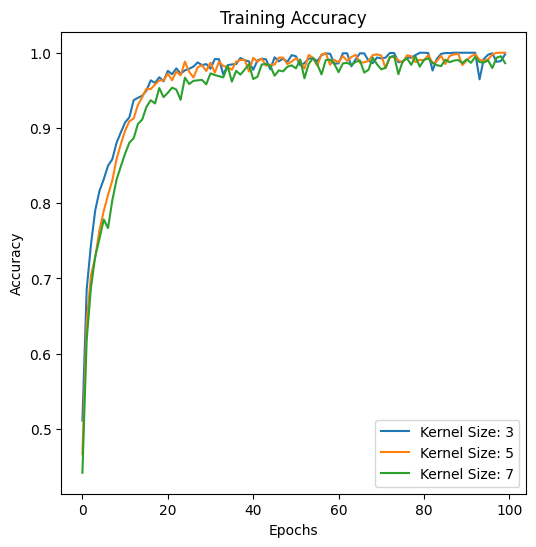

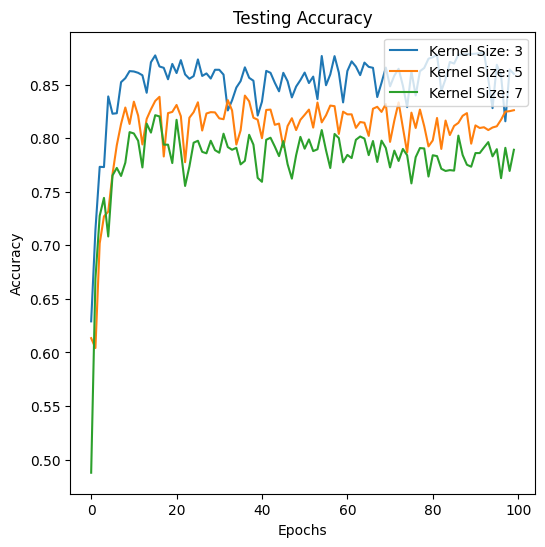

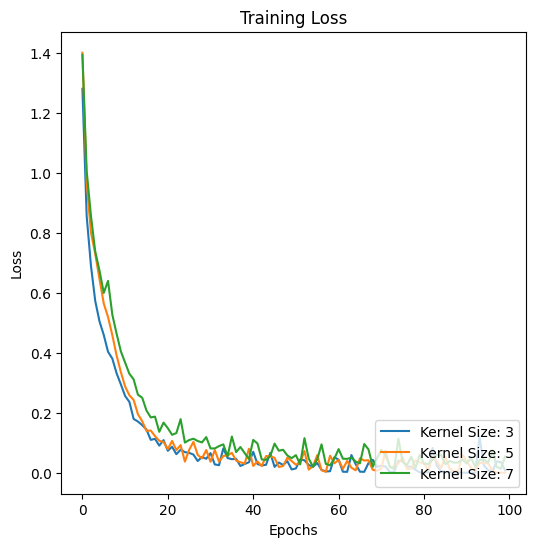

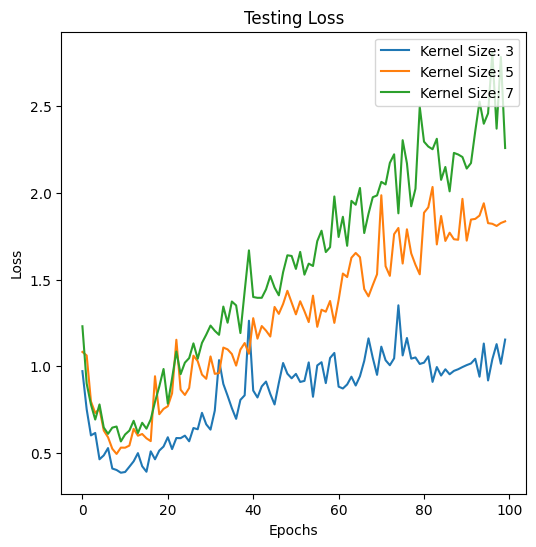

In [ ]:
# Getting testing accuracy and loss
train_acc_kr1 = history_kernel_3.history['accuracy']
train_acc_kr2 = history_kernel_5.history['accuracy']
train_acc_kr3 = history_kernel_7.history['accuracy']

train_loss_kr1 = history_kernel_3.history['loss']
train_loss_kr2 = history_kernel_5.history['loss']
train_loss_kr3 = history_kernel_7.history['loss']

# Getting Validation accuracy
test_acc_kr1 = history_kernel_3.history['val_accuracy']
test_acc_kr2 = history_kernel_5.history['val_accuracy']
test_acc_kr3 = history_kernel_7.history['val_accuracy']

test_loss_kr1 = history_kernel_3.history['val_loss']
test_loss_kr2 = history_kernel_5.history['val_loss']
test_loss_kr3 = history_kernel_7.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(6, 6))
plt.plot(epochs_range, train_acc_kr1, label='Kernel Size: 3')
plt.plot(epochs_range, train_acc_kr2, label='Kernel Size: 5')
plt.plot(epochs_range, train_acc_kr3, label='Kernel Size: 7')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.figure(figsize=(6, 6))
# plt.subplot(1, 2, 2)
plt.plot(epochs_range, test_acc_kr1, label='Kernel Size: 3')
plt.plot(epochs_range, test_acc_kr2, label='Kernel Size: 5')
plt.plot(epochs_range, test_acc_kr3, label='Kernel Size: 7')
# plt.plot(epochs_range, test_acc_lr4, label='lr=1')
# plt.plot(epochs_range, test_acc_lr5, label='lr=10')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.title('Testing Accuracy')

plt.figure(figsize=(6, 6))
# plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss_kr1, label='Kernel Size: 3')
plt.plot(epochs_range, train_loss_kr2, label='Kernel Size: 5')
plt.plot(epochs_range, train_loss_kr3, label='Kernel Size: 7')
# plt.plot(epochs_range, train_loss_lr4, label='lr=1')
# plt.plot(epochs_range, train_loss_lr5, label='lr=10')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.title('Training Loss')

plt.figure(figsize=(6, 6))
# plt.subplot(1, 2, 2)
plt.plot(epochs_range, test_loss_kr1, label='Kernel Size: 3')
plt.plot(epochs_range, test_loss_kr2, label='Kernel Size: 5')
plt.plot(epochs_range, test_loss_kr3, label='Kernel Size: 7')
# plt.plot(epochs_range, test_loss_lr4, label='lr=1')
# plt.plot(epochs_range, test_loss_lr5, label='lr=10')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Testing Loss')

plt.show()

"""
After conducting a comprehensive analysis of the accuracy and loss graphs obtained from both the training and testing phases,
the findings suggest that the choice of kernel size does not significantly impact
the performance of the model in addressing the specific problem at hand.
"""

Image shape is  (64, 64, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin 

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


413/413 [==============================] - 11s 11ms/step - loss: 1.3602 - accuracy: 0.4823 - val_loss: 1.0290 - val_accuracy: 0.6059
Epoch 2/100
413/413 [==============================] - 3s 8ms/step - loss: 1.0182 - accuracy: 0.6212 - val_loss: 0.8381 - val_accuracy: 0.6868
Epoch 3/100
413/413 [==============================] - 4s 10ms/step - loss: 0.8692 - accuracy: 0.6784 - val_loss: 0.6990 - val_accuracy: 0.7507
Epoch 4/100
413/413 [==============================] - 3s 8ms/step - loss: 0.7681 - accuracy: 0.7211 - val_loss: 0.7140 - val_accuracy: 0.7344
Epoch 5/100
413/413 [==============================] - 4s 9ms/step - loss: 0.6829 - accuracy: 0.7545 - val_loss: 0.6373 - val_accuracy: 0.7668
Epoch 6/100
413/413 [==============================] - 4s 9ms/step - loss: 0.6289 - accuracy: 0.7764 - val_loss: 0.4963 - val_accuracy: 0.8366
Epoch 7/100
413/413 [==============================] - 4s 10ms/step - loss: 0.5704 - accuracy: 0.7933 - val_loss: 0.5943 - val_accuracy: 0.7794
Epoch 8

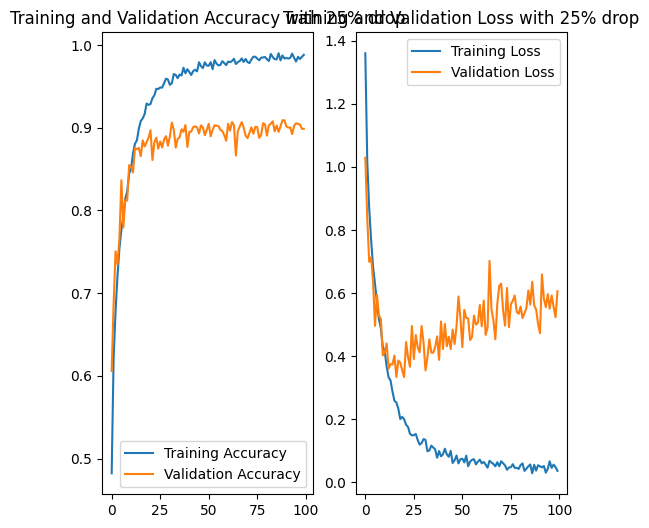

In [ ]:
"""
Furthermore, an observation from the model's performance indicates a potential issue of overfitting,
characterized by a notable contrast between the training accuracy and the decreasing accuracy during testing.
To address this concern, a strategy will be implemented to mitigate overfitting by incorporating a dropout layer into the model architecture.
"""

# First test case adding dropout layer with 25% drop ration
# First I have started with the number of epochs and I found that after 100 epochs the output is almost same
# so here I will go with 100 epochs.
# Epochs
input_shape = normalized_images[0].shape
kernel_size = 3
num_of_classes = 9
batch_size = 32
is_dropout = True
is_padding = False
is_stride = False
epochs = 100
print("Image shape is ", input_shape)

dropout_layer_25 = CNN(input_shape, kernel_size, num_of_classes, is_dropout, is_padding, is_stride)

# Spliting the data for training and testing
# Data is Prepared for the train and test
X_train, X_test, y_train, y_test = train_test_split(normalized_images, labels_reshaped, test_size = 0.4, random_state=42)

# Compile the model with adam optimizer, and sparse categorical loss function
dropout_layer_25.model.compile(
    optimizer = 'Adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history_dropout_25 = dropout_layer_25.model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs= epochs)

acc = history_dropout_25.history['accuracy']
val_acc = history_dropout_25.history['val_accuracy']

# Getting the values of loss of both training and validation set
loss = history_dropout_25.history['loss']
val_loss = history_dropout_25.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy with 25% drop')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss with 25% drop')
plt.show()



Image shape is  (64, 64, 3)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooli

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


413/413 [==============================] - 6s 11ms/step - loss: 1.4474 - accuracy: 0.4487 - val_loss: 1.0621 - val_accuracy: 0.6069
Epoch 2/100
413/413 [==============================] - 3s 8ms/step - loss: 1.0760 - accuracy: 0.6130 - val_loss: 0.7985 - val_accuracy: 0.7145
Epoch 3/100
413/413 [==============================] - 3s 8ms/step - loss: 0.9122 - accuracy: 0.6737 - val_loss: 0.7253 - val_accuracy: 0.7381
Epoch 4/100
413/413 [==============================] - 4s 10ms/step - loss: 0.8139 - accuracy: 0.7087 - val_loss: 0.6315 - val_accuracy: 0.7641
Epoch 5/100
413/413 [==============================] - 3s 8ms/step - loss: 0.7504 - accuracy: 0.7369 - val_loss: 0.6155 - val_accuracy: 0.7791
Epoch 6/100
413/413 [==============================] - 3s 8ms/step - loss: 0.7072 - accuracy: 0.7495 - val_loss: 0.5187 - val_accuracy: 0.8216
Epoch 7/100
413/413 [==============================] - 3s 8ms/step - loss: 0.6319 - accuracy: 0.7780 - val_loss: 0.5725 - val_accuracy: 0.8055
Epoch 8/1

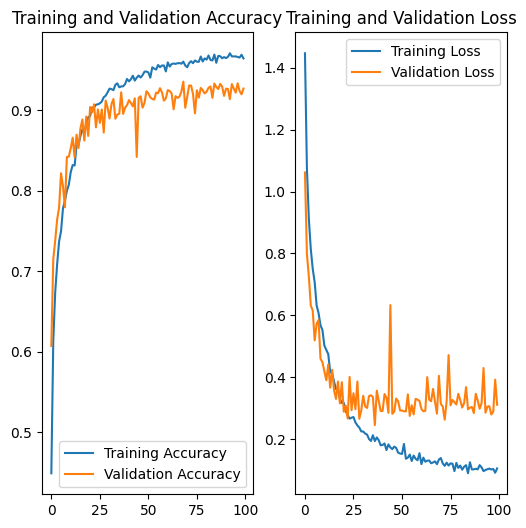

In [ ]:
"""
Furthermore, an observation from the model's performance indicates a potential issue of overfitting,
characterized by a notable contrast between the training accuracy and the decreasing accuracy during testing.
To address this concern, a strategy will be implemented to mitigate overfitting by incorporating a dropout layer into the model architecture.
"""

# First test case adding dropout layer with 25% drop ration
# First I have started with the number of epochs and I found that after 100 epochs the output is almost same
# so here I will go with 100 epochs.
# Epochs
input_shape = normalized_images[0].shape
kernel_size = 3
num_of_classes = 9
batch_size = 32
is_dropout = True
is_padding = False
is_stride = False
epochs = 100
print("Image shape is ", input_shape)

dropout_layer_50 = CNN(input_shape, kernel_size, num_of_classes, is_dropout, is_padding, is_stride)

# Spliting the data for training and testing
# Data is Prepared for the train and test
X_train, X_test, y_train, y_test = train_test_split(normalized_images, labels_reshaped, test_size = 0.4, random_state=42)

# Compile the model with adam optimizer, and sparse categorical loss function
dropout_layer_50.model.compile(
    optimizer = 'Adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history_dropout_50 = dropout_layer_50.model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs= epochs)

acc = history_dropout_50.history['accuracy']
val_acc = history_dropout_50.history['val_accuracy']

# Getting the values of loss of both training and validation set
loss = history_dropout_50.history['loss']
val_loss = history_dropout_50.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



Image shape is  (64, 64, 3)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPool

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


413/413 [==============================] - 6s 10ms/step - loss: 1.7049 - accuracy: 0.3380 - val_loss: 1.2657 - val_accuracy: 0.5227
Epoch 2/100
413/413 [==============================] - 4s 9ms/step - loss: 1.3538 - accuracy: 0.4817 - val_loss: 1.0285 - val_accuracy: 0.6066
Epoch 3/100
413/413 [==============================] - 3s 8ms/step - loss: 1.2190 - accuracy: 0.5393 - val_loss: 0.9161 - val_accuracy: 0.6855
Epoch 4/100
413/413 [==============================] - 3s 8ms/step - loss: 1.1395 - accuracy: 0.5721 - val_loss: 0.8421 - val_accuracy: 0.7008
Epoch 5/100
413/413 [==============================] - 4s 9ms/step - loss: 1.0512 - accuracy: 0.6209 - val_loss: 0.7574 - val_accuracy: 0.7205
Epoch 6/100
413/413 [==============================] - 3s 8ms/step - loss: 1.0050 - accuracy: 0.6360 - val_loss: 0.7638 - val_accuracy: 0.7206
Epoch 7/100
413/413 [==============================] - 3s 8ms/step - loss: 0.9578 - accuracy: 0.6619 - val_loss: 0.7017 - val_accuracy: 0.7500
Epoch 8/10

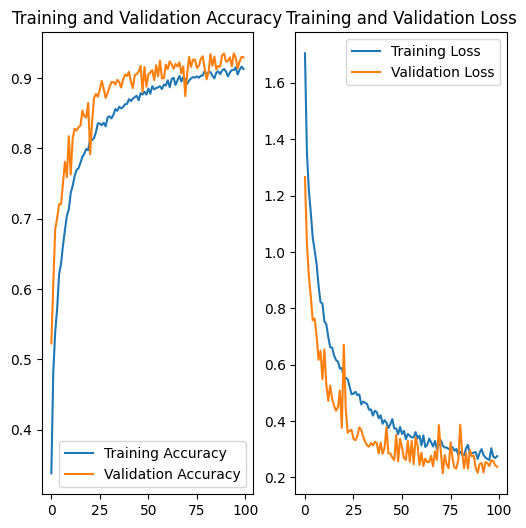

In [ ]:
"""
Furthermore, an observation from the model's performance indicates a potential issue of overfitting,
characterized by a notable contrast between the training accuracy and the decreasing accuracy during testing.
To address this concern, a strategy will be implemented to mitigate overfitting by incorporating a dropout layer into the model architecture.
"""

# First test case adding dropout layer with 25% drop ration
# First I have started with the number of epochs and I found that after 100 epochs the output is almost same
# so here I will go with 100 epochs.
# Epochs
input_shape = normalized_images[0].shape
kernel_size = 3
num_of_classes = 9
batch_size = 32
is_dropout = True
is_padding = False
is_stride = False
epochs = 100
print("Image shape is ", input_shape)

dropout_layer_501 = CNN(input_shape, kernel_size, num_of_classes, is_dropout, is_padding, is_stride)

# Spliting the data for training and testing
# Data is Prepared for the train and test
X_train, X_test, y_train, y_test = train_test_split(normalized_images, labels_reshaped, test_size = 0.4, random_state=42)

# Compile the model with adam optimizer, and sparse categorical loss function
dropout_layer_501.model.compile(
    optimizer = 'Adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history_dropout_501 = dropout_layer_501.model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs= epochs)

acc = history_dropout_501.history['accuracy']
val_acc = history_dropout_501.history['val_accuracy']

# Getting the values of loss of both training and validation set
loss = history_dropout_501.history['loss']
val_loss = history_dropout_501.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# 5% drop in both training and testing with 75% drop

Image shape is  (64, 64, 3)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                          

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


413/413 [==============================] - 9s 13ms/step - loss: 0.8622 - accuracy: 0.6970 - val_loss: 1.9567 - val_accuracy: 0.3927
Epoch 2/100
413/413 [==============================] - 5s 13ms/step - loss: 0.5494 - accuracy: 0.8048 - val_loss: 1.0312 - val_accuracy: 0.6825
Epoch 3/100
413/413 [==============================] - 5s 11ms/step - loss: 0.4359 - accuracy: 0.8473 - val_loss: 0.9341 - val_accuracy: 0.6990
Epoch 4/100
413/413 [==============================] - 4s 11ms/step - loss: 0.3406 - accuracy: 0.8830 - val_loss: 1.1062 - val_accuracy: 0.6780
Epoch 5/100
413/413 [==============================] - 5s 11ms/step - loss: 0.2867 - accuracy: 0.9011 - val_loss: 0.4569 - val_accuracy: 0.8541
Epoch 6/100
413/413 [==============================] - 4s 10ms/step - loss: 0.2353 - accuracy: 0.9151 - val_loss: 2.0558 - val_accuracy: 0.5189
Epoch 7/100
413/413 [==============================] - 5s 11ms/step - loss: 0.1933 - accuracy: 0.9330 - val_loss: 0.6791 - val_accuracy: 0.7862
Epoc

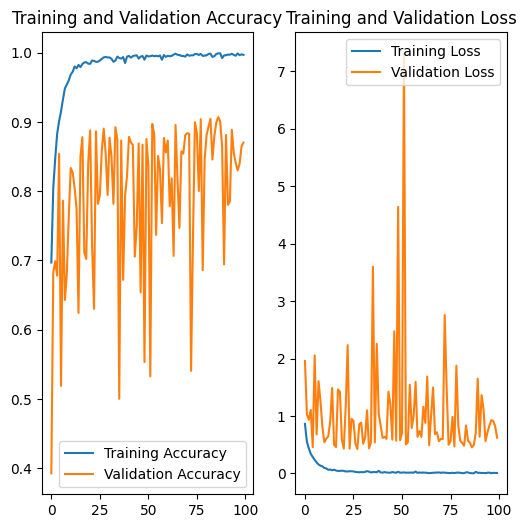

In [ ]:
# Let's use batch normalization
# First I have started with the number of epochs and I found that after 100 epochs the output is almost same
# so here I will go with 100 epochs.
# Epochs
input_shape = normalized_images[0].shape
kernel_size = 3
num_of_classes = 9
batch_size = 32
is_dropout = False
is_padding = False
is_stride = False
epochs = 100
print("Image shape is ", input_shape)

batch_norm = CNN(input_shape, kernel_size, num_of_classes, is_dropout, is_padding, is_stride)

# Spliting the data for training and testing
# Data is Prepared for the train and test
X_train, X_test, y_train, y_test = train_test_split(normalized_images, labels_reshaped, test_size = 0.4, random_state=42)

# Compile the model with adam optimizer, and sparse categorical loss function
batch_norm.model.compile(
    optimizer = 'Adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history_batch_norm = batch_norm.model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs= epochs)

acc = history_batch_norm.history['accuracy']
val_acc = history_batch_norm.history['val_accuracy']

# Getting the values of loss of both training and validation set
loss = history_batch_norm.history['loss']
val_loss = history_batch_norm.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Image shape is  (64, 64, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                            

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


413/413 [==============================] - 13s 14ms/step - loss: 1.0797 - accuracy: 0.6312 - val_loss: 2.5949 - val_accuracy: 0.2565
Epoch 2/100
413/413 [==============================] - 4s 11ms/step - loss: 0.7034 - accuracy: 0.7576 - val_loss: 1.5924 - val_accuracy: 0.5502
Epoch 3/100
413/413 [==============================] - 4s 9ms/step - loss: 0.5872 - accuracy: 0.8001 - val_loss: 1.5222 - val_accuracy: 0.4635
Epoch 4/100
413/413 [==============================] - 5s 12ms/step - loss: 0.5101 - accuracy: 0.8260 - val_loss: 1.8203 - val_accuracy: 0.5316
Epoch 5/100
413/413 [==============================] - 4s 11ms/step - loss: 0.4429 - accuracy: 0.8536 - val_loss: 0.8322 - val_accuracy: 0.7434
Epoch 6/100
413/413 [==============================] - 4s 10ms/step - loss: 0.4008 - accuracy: 0.8666 - val_loss: 0.8984 - val_accuracy: 0.7385
Epoch 7/100
413/413 [==============================] - 5s 13ms/step - loss: 0.3700 - accuracy: 0.8772 - val_loss: 1.2725 - val_accuracy: 0.6424
Epoc

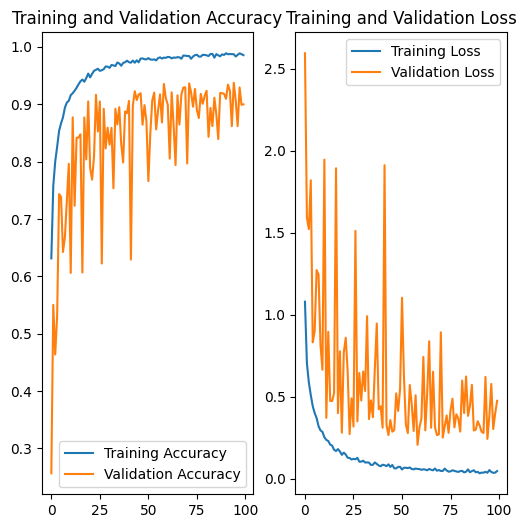

In [ ]:
# Using both batch normalization and dropout layer and the dropout ratio will be 50%
# First I have started with the number of epochs and I found that after 100 epochs the output is almost same
# so here I will go with 100 epochs.
# Epochs
input_shape = normalized_images[0].shape
kernel_size = 3
num_of_classes = 9
batch_size = 32
is_dropout = True
is_padding = False
is_stride = False
epochs = 100
print("Image shape is ", input_shape)

batch_norm_with_drop = CNN(input_shape, kernel_size, num_of_classes, is_dropout, is_padding, is_stride)

# Spliting the data for training and testing
# Data is Prepared for the train and test
X_train, X_test, y_train, y_test = train_test_split(normalized_images, labels_reshaped, test_size = 0.4, random_state=42)

# Compile the model with adam optimizer, and sparse categorical loss function
batch_norm_with_drop.model.compile(
    optimizer = 'Adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history_batch_norm_with_drop = batch_norm_with_drop.model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs= epochs)

acc = history_batch_norm_with_drop.history['accuracy']
val_acc = history_batch_norm_with_drop.history['val_accuracy']

# Getting the values of loss of both training and validation set
loss = history_batch_norm_with_drop.history['loss']
val_loss = history_batch_norm_with_drop.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Image shape is  (64, 64, 3)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPool

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


413/413 [==============================] - 7s 13ms/step - loss: 2.0939 - accuracy: 0.1665 - val_loss: 1.9214 - val_accuracy: 0.2810
Epoch 2/300
413/413 [==============================] - 4s 9ms/step - loss: 1.8671 - accuracy: 0.2808 - val_loss: 1.7271 - val_accuracy: 0.3311
Epoch 3/300
413/413 [==============================] - 3s 8ms/step - loss: 1.7739 - accuracy: 0.3020 - val_loss: 1.6538 - val_accuracy: 0.3480
Epoch 4/300
413/413 [==============================] - 4s 9ms/step - loss: 1.7293 - accuracy: 0.3167 - val_loss: 1.6074 - val_accuracy: 0.3490
Epoch 5/300
413/413 [==============================] - 3s 7ms/step - loss: 1.6886 - accuracy: 0.3306 - val_loss: 1.5603 - val_accuracy: 0.4117
Epoch 6/300
413/413 [==============================] - 3s 7ms/step - loss: 1.6356 - accuracy: 0.3601 - val_loss: 1.5062 - val_accuracy: 0.4489
Epoch 7/300
413/413 [==============================] - 3s 7ms/step - loss: 1.5960 - accuracy: 0.3858 - val_loss: 1.4582 - val_accuracy: 0.4723
Epoch 8/30

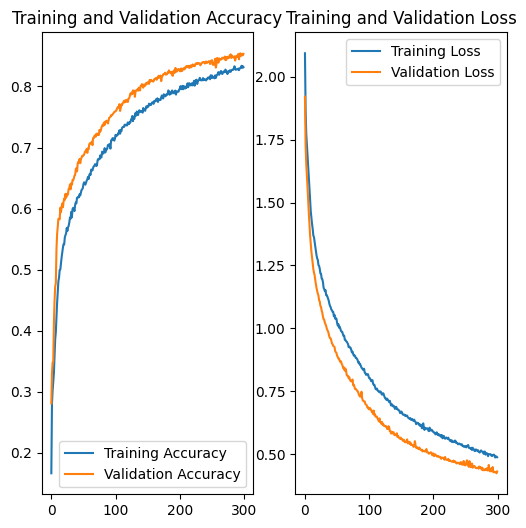

In [ ]:
# Using very little loss function
# With three different kernel size 3,5,7
# Learning rate 10
input_shape = normalized_images[0].shape
kernel_size = 3
num_of_classes = 9
batch_size = 32
is_dropout = True
is_padding = False
is_stride = False
epochs = 300
print("Image shape is ", input_shape)

little_lr_1 = CNN(input_shape, kernel_size, num_of_classes, is_dropout, is_padding, is_stride)

# Spliting the data for training and testing
# Data is Prepared for the train and test
X_train, X_test, y_train, y_test = train_test_split(normalized_images, labels_reshaped, test_size = 0.4, random_state=42)

# Compile the model with adam optimizer, and sparse categorical loss function
little_lr_1.model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history_little_lr_1 = little_lr_1.model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs= epochs)

acc = history_little_lr_1.history['accuracy']
val_acc = history_little_lr_1.history['val_accuracy']

# Getting the values of loss of both training and validation set
loss = history_little_lr_1.history['loss']
val_loss = history_little_lr_1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Image shape is  (64, 64, 3)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPool

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


413/413 [==============================] - 7s 11ms/step - loss: 1.5333 - accuracy: 0.3986 - val_loss: 1.1214 - val_accuracy: 0.5859
Epoch 2/100
413/413 [==============================] - 3s 7ms/step - loss: 1.1451 - accuracy: 0.5839 - val_loss: 0.9048 - val_accuracy: 0.6580
Epoch 3/100
413/413 [==============================] - 3s 8ms/step - loss: 0.9469 - accuracy: 0.6619 - val_loss: 1.2122 - val_accuracy: 0.5534
Epoch 4/100
413/413 [==============================] - 4s 9ms/step - loss: 0.8382 - accuracy: 0.7035 - val_loss: 0.6167 - val_accuracy: 0.7784
Epoch 5/100
413/413 [==============================] - 4s 9ms/step - loss: 0.7532 - accuracy: 0.7352 - val_loss: 0.6248 - val_accuracy: 0.7635
Epoch 6/100
413/413 [==============================] - 3s 7ms/step - loss: 0.6866 - accuracy: 0.7606 - val_loss: 0.6284 - val_accuracy: 0.7594
Epoch 7/100
413/413 [==============================] - 4s 9ms/step - loss: 0.6391 - accuracy: 0.7781 - val_loss: 0.5128 - val_accuracy: 0.8155
Epoch 8/10

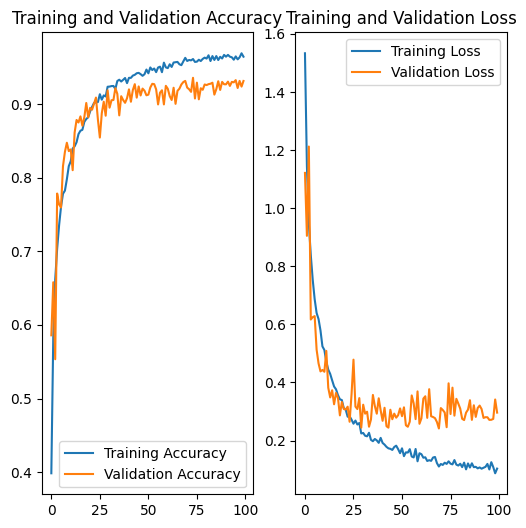

In [ ]:
# Padding
# Using both batch normalization and dropout layer and the dropout ratio will be 50%
# First I have started with the number of epochs and I found that after 100 epochs the output is almost same
# so here I will go with 100 epochs.
# Epochs
input_shape = normalized_images[0].shape
kernel_size = 3
num_of_classes = 9
batch_size = 32
is_dropout = True
is_padding = True
is_stride = False
epochs = 100
print("Image shape is ", input_shape)

with_padding = CNN(input_shape, kernel_size, num_of_classes, is_dropout, is_padding, is_stride)

# Spliting the data for training and testing
# Data is Prepared for the train and test
X_train, X_test, y_train, y_test = train_test_split(normalized_images, labels_reshaped, test_size = 0.4, random_state=42)

# Compile the model with adam optimizer, and sparse categorical loss function
with_padding.model.compile(
    optimizer = 'Adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history_with_padding = with_padding.model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs= epochs)

acc = history_with_padding.history['accuracy']
val_acc = history_with_padding.history['val_accuracy']

# Getting the values of loss of both training and validation set
loss = history_with_padding.history['loss']
val_loss = history_with_padding.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Padding
# Using both batch normalization and dropout layer and the dropout ratio will be 50%
# First I have started with the number of epochs and I found that after 100 epochs the output is almost same
# so here I will go with 100 epochs.
# Epochs
input_shape = normalized_images[0].shape
kernel_size = 3
num_of_classes = 9
batch_size = 32
is_dropout = True
is_padding = False
is_stride = True
epochs = 100
print("Image shape is ", input_shape)

with_padding_stride = CNN(input_shape, kernel_size, num_of_classes, is_dropout, is_padding, is_stride)

# Spliting the data for training and testing
# Data is Prepared for the train and test
X_train, X_test, y_train, y_test = train_test_split(normalized_images, labels_reshaped, test_size = 0.4, random_state=42)

# Compile the model with adam optimizer, and sparse categorical loss function
with_padding_stride.model.compile(
    optimizer = 'Adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history_with_padding_stride = with_padding_stride.model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs= epochs)

acc = history_with_padding_stride.history['accuracy']
val_acc = history_with_padding_stride.history['val_accuracy']

# Getting the values of loss of both training and validation set
loss = history_with_padding_stride.history['loss']
val_loss = history_with_padding_stride.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Image shape is  (64, 64, 3)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 max_pooling2d_7 (MaxPooli

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


413/413 [==============================] - 18s 39ms/step - loss: 1.6714 - accuracy: 0.3368 - val_loss: 1.2067 - val_accuracy: 0.5559
Epoch 2/100
413/413 [==============================] - 16s 38ms/step - loss: 1.2737 - accuracy: 0.5197 - val_loss: 1.1387 - val_accuracy: 0.5928
Epoch 3/100
413/413 [==============================] - 15s 37ms/step - loss: 1.1273 - accuracy: 0.5875 - val_loss: 1.0524 - val_accuracy: 0.6090
Epoch 4/100
413/413 [==============================] - 18s 43ms/step - loss: 1.0498 - accuracy: 0.6209 - val_loss: 0.9191 - val_accuracy: 0.6773
Epoch 5/100
413/413 [==============================] - 15s 36ms/step - loss: 0.9633 - accuracy: 0.6556 - val_loss: 0.8068 - val_accuracy: 0.7143
Epoch 6/100
413/413 [==============================] - 15s 37ms/step - loss: 0.9121 - accuracy: 0.6698 - val_loss: 0.7531 - val_accuracy: 0.7261
Epoch 7/100
413/413 [==============================] - 15s 37ms/step - loss: 0.8797 - accuracy: 0.6848 - val_loss: 0.7597 - val_accuracy: 0.71

KeyboardInterrupt: 

In [ ]:
# First I have started with the number of epochs and I found that after 100 epochs the output is almost same
# so here I will go with 100 epochs.
# Epochs
input_shape = normalized_images[0].shape
kernel_size = 3
num_of_classes = 9
batch_size = 32
is_dropout = False
is_padding = False
is_stride = False
epochs = 100
print("Image shape is ", input_shape)

model_for_epochs_experiment = CNN(input_shape, kernel_size, num_of_classes, is_dropout, is_padding, is_stride)

Image shape is  (64, 64, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin 

In [ ]:
import visualkeras

ModuleNotFoundError: No module named 'visualkeras'

In [ ]:
pip install git+https://github.com/paulgavrikov/visualkeras

  Cloning https://github.com/paulgavrikov/visualkeras to /tmp/pip-req-build-gspqo6xe
  Running command git clone --filter=blob:none --quiet https://github.com/paulgavrikov/visualkeras /tmp/pip-req-build-gspqo6xe
  Resolved https://github.com/paulgavrikov/visualkeras to commit ccc27c21c2275973ff94e7bd773c4f11f78916d7
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 6.2 MB/s eta 0:00:00
  Created wheel for visualkeras: filename=visualkeras-0.0.2-py3-none-any.whl size=13719 sha256=47c7a82bac086befabfb86b451cbcbf56f0859ce350e4f50d07c0e7b737356f6
  Stored in directory: /tmp/pip-ephem-wheel-cache-wwcmv6a0/wheels/89/d3/c2/937382b33c09192fc84331bbc02c4565d62aeae67e9684c37e
Successfully built visualkeras


In [ ]:
import visualkeras

In [ ]:
visualkeras.layered_view(model_for_epochs_experiment.model).show() # display using your system viewer

In [ ]:
visualkeras.layered_view(model_for_epochs_experiment.model, to_file='output.png') # write to disk
visualkeras.layered_view(model_for_epochs_experiment.model, to_file='output.png').show() # write and show

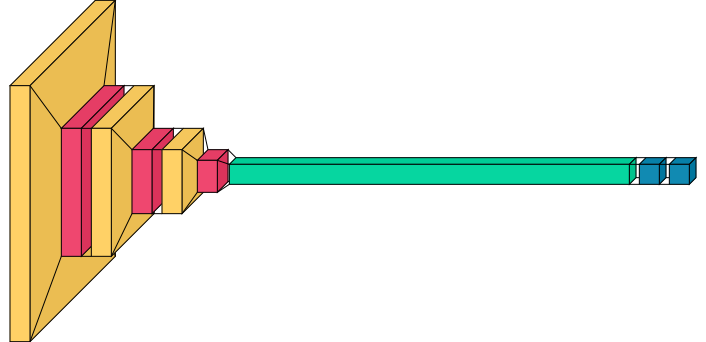

In [ ]:
visualkeras.layered_view(model_for_epochs_experiment.model)

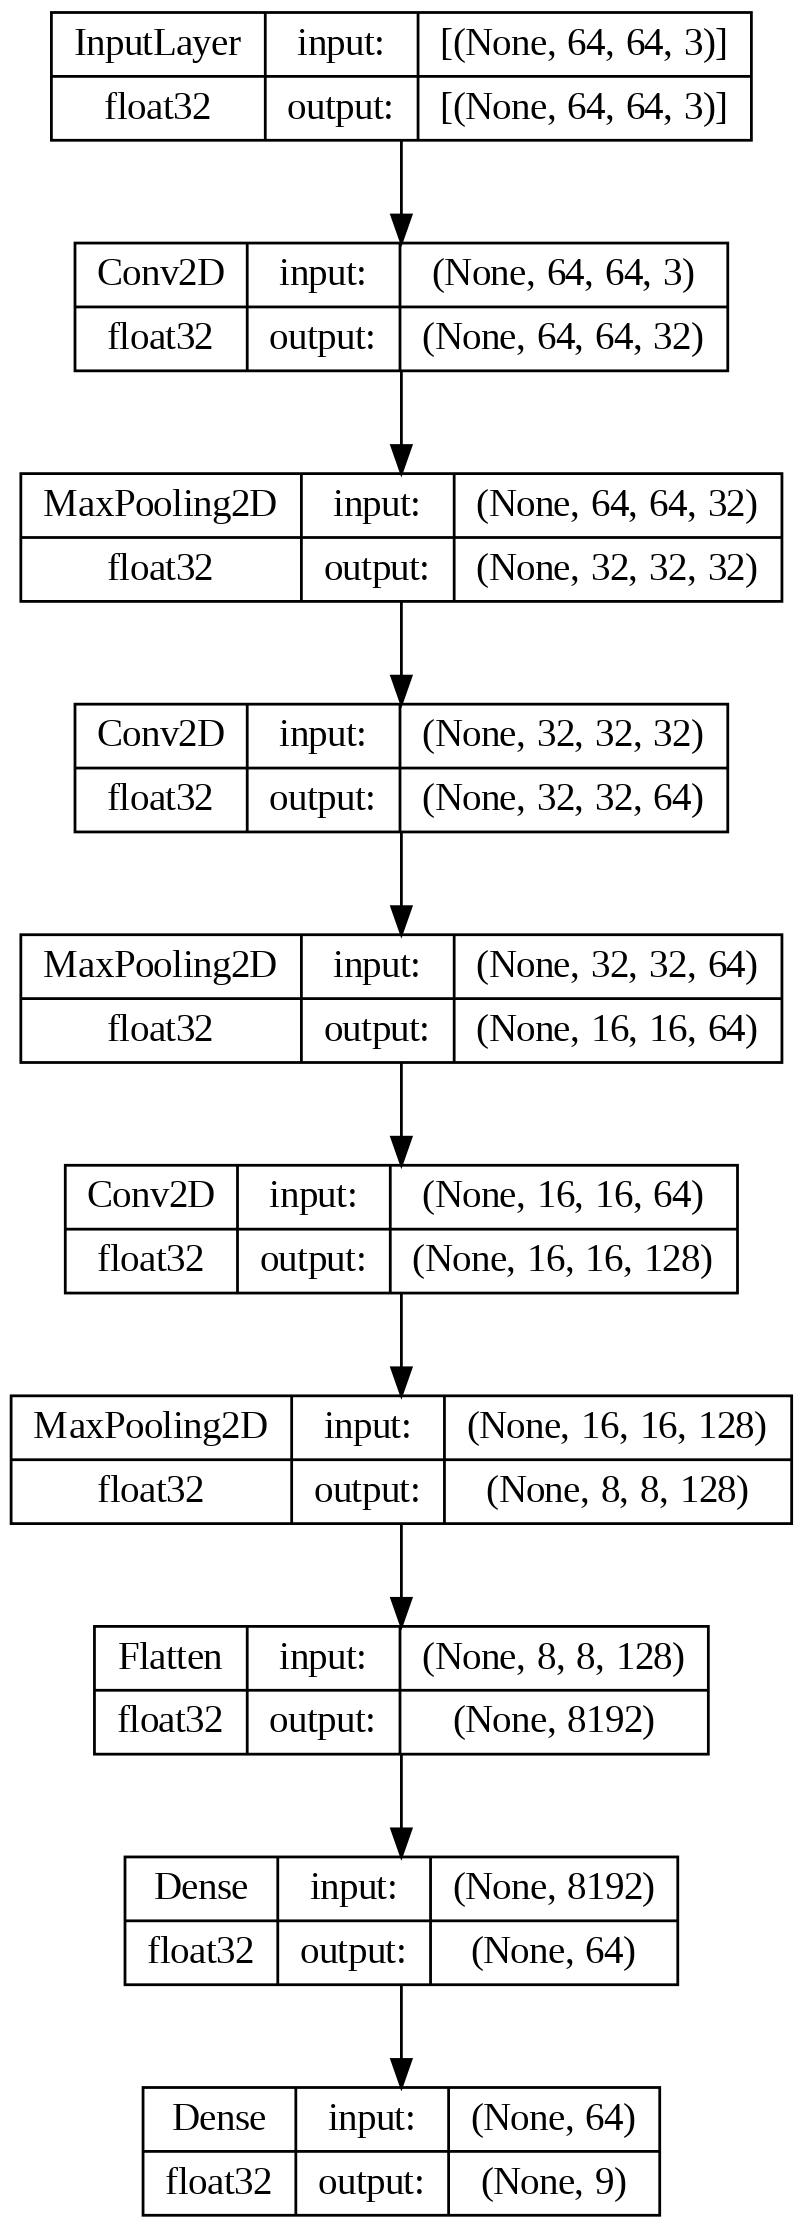

In [ ]:
import keras
keras.utils.plot_model(
    model_for_epochs_experiment.model,
    to_file="final_model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=False,
    rankdir="TB",
    expand_nested=False,
    dpi=200,
    show_layer_activations=False,
    show_trainable=False,
)